In [1]:
#Add Matplotlib inline magic command
%matplotlib inline
#Dependencies and Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#Files to load
results_data_to_load = "result.csv"

# Read the Results Data
results_data_df = pd.read_csv(results_data_to_load)

In [2]:
results_data_df.head()

,animal_id,datetime_intake,found_location,intake_type,intake_condition,animal_type_intake,name_intake,sex_intake,color_intake,breed_type,datetime_outcome,outcome_type,sex_upon_outcome,fixed_changed,age_bucket,datetime_length
0,A730601,2016-07-07 12:11:00,1109 Shady Ln in Austin (TX),Stray,Normal,Cat,No,Intact Male,Tabby,Mix,2016-07-08 09:00:00,Transfer,Neutered Male,1,7-12 months,74940000000000
1,A676515,2014-04-11 08:45:00,615 E. Wonsley in Austin (TX),Stray,Normal,Dog,Yes,Intact Male,Bicolor,Mix,2014-04-14 18:38:00,Return to Owner,Neutered Male,1,1-6 months,294780000000000
2,A679549,2014-05-22 15:43:00,124 W Anderson in Austin (TX),Stray,Normal,Cat,Yes,Intact Male,Bicolor,Mix,2014-06-16 13:54:00,Transfer,Neutered Male,1,1-6 months,2153460000000000
3,A683798,2016-07-21 12:16:00,3118 Windsor Rd in Austin (TX),Stray,Normal,Cat,Yes,Spayed Female,Bicolor,Mix,2016-10-18 10:55:00,Adoption,Spayed Female,0,1-3 years,7684740000000000
4,A683656,2014-07-13 13:20:00,8238 Research Blvd in Austin (TX),Stray,Normal,Cat,No,Intact Male,Point,Mix,2014-07-17 16:57:00,Adoption,Neutered Male,1,1-6 months,358620000000000


In [3]:
#Get count of animal type by intake
animal_type_intake_count = results_data_df.groupby(["animal_type_intake"]).count()["animal_id"]
animal_type_intake_count

animal_type_intake
Cat      15565
Dog      14938
Other     3103
Name: animal_id, dtype: int64

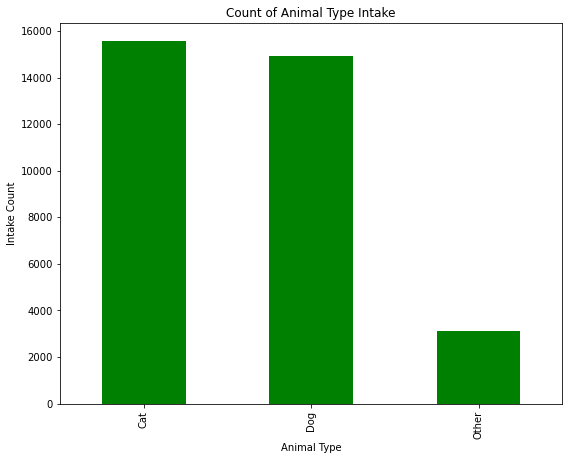

In [4]:
#Plotting a pie chart
plt.figure(figsize=[9,7])
results_data_df['animal_type_intake'].value_counts().plot.bar(color="Green")
plt.xlabel("Animal Type")
plt.ylabel("Intake Count")
plt.title("Count of Animal Type Intake")
# Save Figure
plt.savefig("Fig1.png")
# Show Figure
plt.show()

In [5]:
#Calculate the percentage of rides for each city type.
animal_type_percents = 100 * results_data_df.groupby(["animal_type_intake"]).count()["animal_id"] / results_data_df["animal_id"].count()
animal_type_percents

animal_type_intake
Cat      46.316134
Dog      44.450396
Other     9.233470
Name: animal_id, dtype: float64

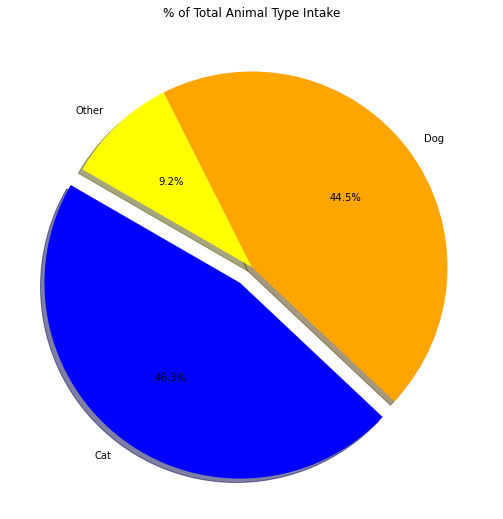

In [6]:
#Build percentage of animal type pie chart.
plt.subplots(figsize=(15, 9))
plt.pie(animal_type_percents,
    labels=["Cat", "Dog", "Other"],
    colors=["Blue", "Orange", "Yellow"],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Total Animal Type Intake")
mpl.rcParams['font.size'] = 20
# Save Figure
plt.savefig("Fig2.png")
# Show Figure
plt.show()

In [7]:
#Get count of animal type by outcome
outcome_type_count = results_data_df.groupby(["outcome_type"]).count()["animal_id"]
outcome_type_count

outcome_type
Adoption           12137
Died                 598
Euthanasia          3882
Missing               19
Return to Owner     4973
Transfer           11997
Name: animal_id, dtype: int64

In [8]:
#Calculate the percentage of rides for each city type.
outcome_type_percents = 100 * results_data_df.groupby(["outcome_type"]).count()["animal_id"] / results_data_df["animal_id"].count()
outcome_type_percents

outcome_type
Adoption           36.115575
Died                1.779444
Euthanasia         11.551509
Missing             0.056538
Return to Owner    14.797953
Transfer           35.698982
Name: animal_id, dtype: float64

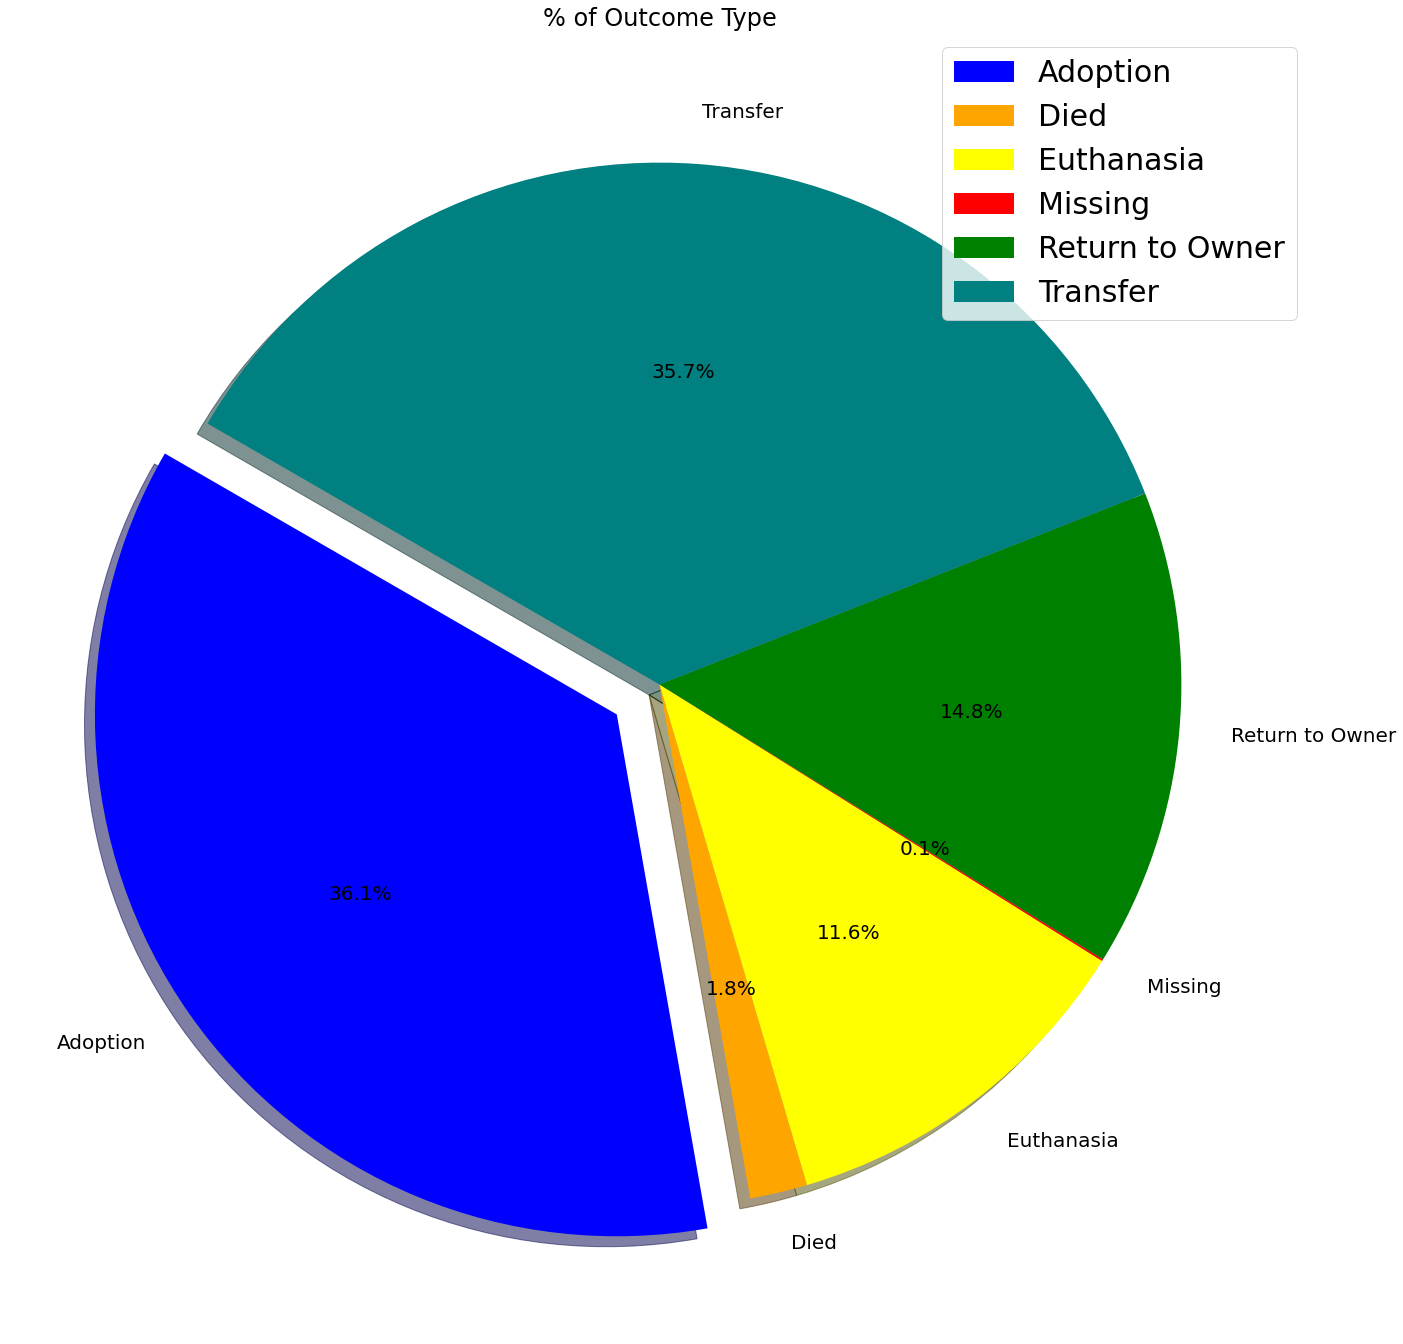

In [9]:
#Build percentage of animal type pie chart.
plt.subplots(figsize=(40, 24))
plt.pie(outcome_type_percents,
    labels=["Adoption", "Died", "Euthanasia", "Missing", "Return to Owner", "Transfer"],
    colors=["Blue", "Orange", "Yellow", "Red", "Green", "Teal"],
    explode=[0.1, 0, 0, 0, 0, 0],
    autopct='%1.1f%%',
    shadow=True, startangle=150)
plt.title("% of Outcome Type")
mpl.rcParams['font.size'] = 30
# Save Figure
plt.savefig("Fig3.png")
plt.legend()
# Show Figure
plt.show()